In [1]:
import sys
from pathlib import Path
sys.path.append(str(Path('..').resolve()))

# Latent feature exploration with t-SNE
The CNN autoencoder compresses images to a 128×4×4 tensor bottleneck. This should encode a lot of interesting information about the fonts. Aim will be to extract features from this latent space and visualise them using t-SNE embedding

In [2]:
import numpy as np
import torch
data_root = Path("..") / "data/fonts"

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Extract the data with font/character labels

In [3]:
from torch.utils.data import DataLoader
from fontcap_model import EnrichedFontcapDataset

dataset = EnrichedFontcapDataset(data_root)
dataloader = DataLoader(dataset, batch_size=8, shuffle=True)

# Import the trained CNN

In [4]:
from fontcap_model import UNet, CNNAutoencoder

model = CNNAutoencoder().to(device)
model.load_state_dict(torch.load("cnn_100_epochs.pt"))

C:\Users\benla\AppData\Local\Temp\ipykernel_4352\4215497571.py:4: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load("cnn_100_epochs.pt"))


<All keys matched successfully>

In [5]:
from fontcap_model import extract_latents

lt, raw_font_labels, raw_char_labels, _ = extract_latents(model, dataloader, device, 1000)

# Calculate and plot the t-SNE embeddings

In [6]:
from analysis import run_tsne

embedding2d = run_tsne(lt, dim=2, n_iter=500)

C:\Users\benla\AppData\Local\Temp\ipykernel_4352\629812722.py:10: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


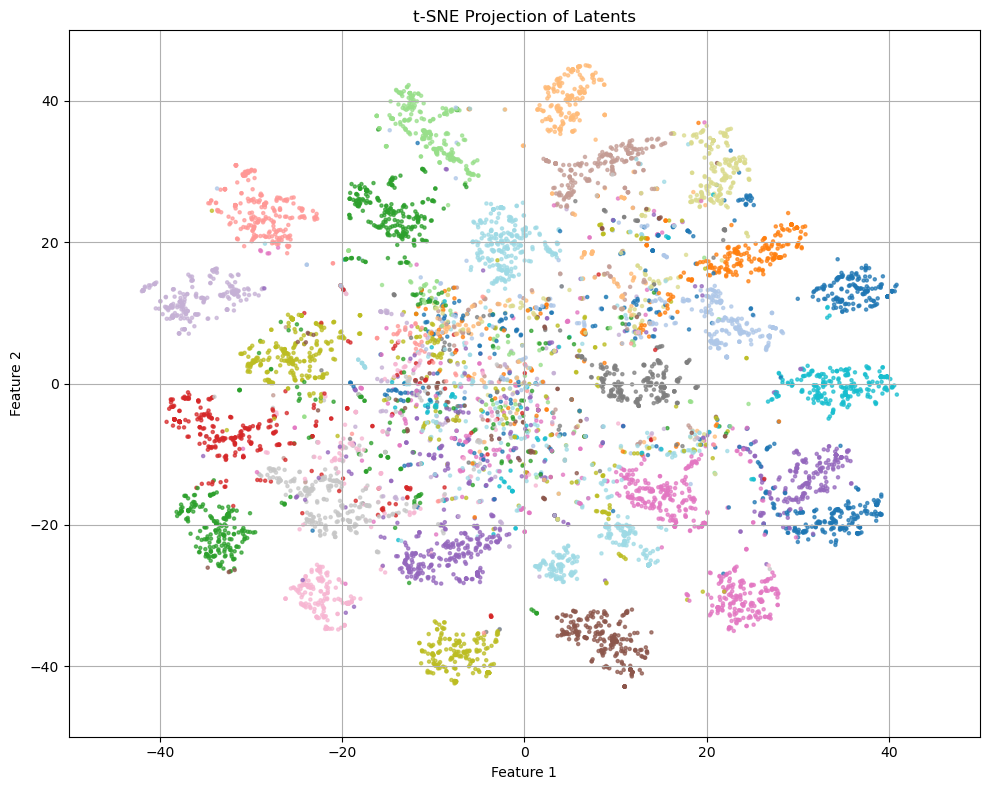

In [7]:
from analysis import plot_tsne_2d

# Encode labels as integers to colour the plot
char_to_int = {char: i for i, char in enumerate(list(set(raw_char_labels)))}
char_labels = [char_to_int[char] for char in raw_char_labels]
fig = plot_tsne_2d(embedding2d, char_labels)
fig.axes[0].set_xlim([-50, 50])
fig.axes[0].set_ylim([-50, 50])
fig.tight_layout()
fig.show()

## Examine individual letters

C:\Users\benla\AppData\Local\Temp\ipykernel_4352\2899235231.py:7: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


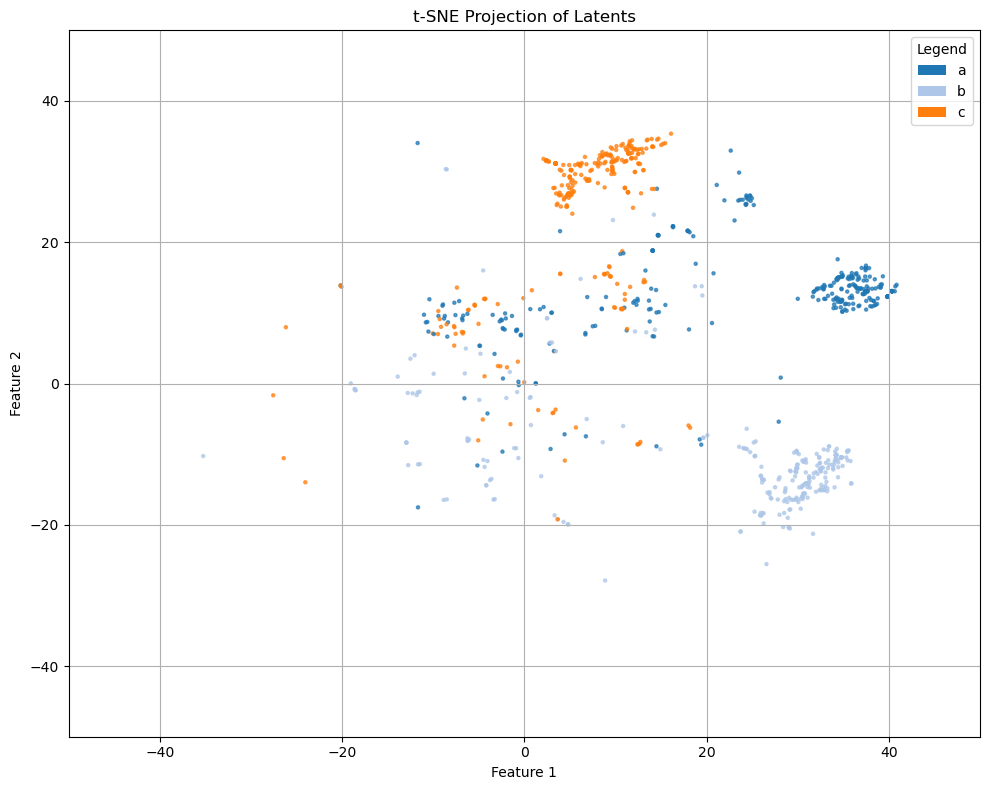

In [8]:
from analysis import plot_tsne_2d_restricted

fig = plot_tsne_2d_restricted(embedding2d, raw_char_labels, ['a', 'b', 'c'])
fig.axes[0].set_xlim([-50, 50])
fig.axes[0].set_ylim([-50, 50])
fig.tight_layout()
fig.show()

## Run the 3D tSNE embedding

In [9]:
embedding3d = run_tsne(lt, dim=3, n_iter=500)

C:\Users\benla\AppData\Local\Temp\ipykernel_4352\1010650793.py:7: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


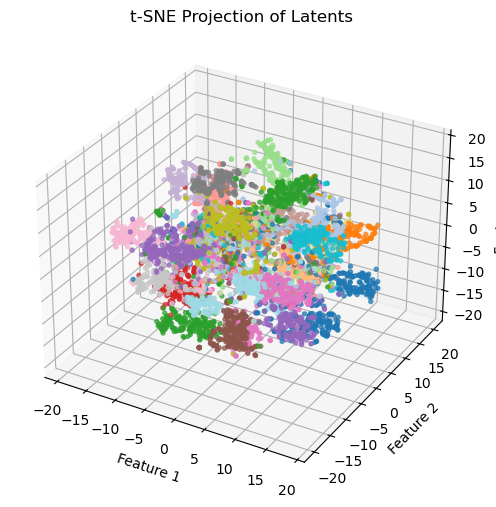

In [13]:
from analysis import plot_tsne_3d

plot_tsne_3d(embedding3d, char_labels)
fig.axes[0].set_xlim([-50, 50])
fig.axes[0].set_ylim([-50, 50])
fig.tight_layout()
fig.show()